# StenoTexty

Tento notebook analyzuje stenografické přepisy schůzí PS ČR.

## Instalace knihovny Parlamentikon

Nastavení notebooku pro prostředí Google Colab a pro lokální běh.

In [1]:
# Specifické příkazy pro prostředí Google Colab
if 'google.colab' in str(get_ipython()):
        import os, sys
        os.chdir('/content')
        # Stažení knihovny
        ! ls parlamentikon || git clone "https://github.com/parlamentikon/parlamentikon.git" --branch main
        os.chdir('/content/parlamentikon/notebooks')

In [2]:
instalace_zavislosti = True
if instalace_zavislosti:
    ! pip install -r ../requirements.txt 1>/dev/null

You should consider upgrading via the '/home/borjana/.venv/finance/bin/python -m pip install --upgrade pip' command.


In [3]:
instalace_knihovny = False
if instalace_knihovny:
    ! pip install ..  1>/dev/null
else:
    # Přidání cesty pro lokální import knihovny
    import sys, os
    sys.path.insert(0, os.path.abspath('..'))

## Import knihoven

In [4]:
from datetime import datetime, timedelta
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [5]:
from parlamentikon.Hlasovani import Organy
from parlamentikon.Snemovna import *
from parlamentikon.StenoTexty import *
from parlamentikon.utility import *

In [6]:
from nastav_notebook import nastav_pandas
nastav_pandas()

## Nastavení parametrů

In [7]:
# Data se budou pokaždé znovu stahovat z achivu PS
stahni=True

## Načtení dat

In [8]:
vsechny_organy = Organy(volebni_obdobi=-1)
snemovny = vsechny_organy[vsechny_organy.nazev_typ_organ_cz == 'Parlament'].od_organ.dt.year.sort_values()
snemovny = snemovny.sort_values().to_list()
posledni_snemovna = snemovny[-1]
assert isinstance(posledni_snemovna, int)
print(f"Snemovny dle počátku roku: {snemovny}.")
print(f"Poslední sněmovna: {posledni_snemovna}.")

2021-06-06:12:38:46 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.


Snemovny dle počátku roku: [1992, 1996, 1998, 2002, 2006, 2010, 2013, 2017].
Poslední sněmovna: 2017.


### Načtení tabulku StenoTexty

In [9]:
st = StenoTexty(volebni_obdobi=2017, stahni=True)

2021-06-06:12:38:47 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/poslanci.zip'.
2021-06-06:12:38:48 WARNING  [Snemovna.py:149] While merging 'funkce' with 'typ_funkce': Dropping ['nazev_typ_organ_en__typ_funkce', 'typ_id_typ_organ__typ_funkce', 'nazev_typ_organ_cz__typ_funkce', 'id_typ_organ__typ_funkce', 'typ_organ_obecny__typ_funkce'] because of abundance.
2021-06-06:12:38:48 INFO     [utility.py:21] Stahuji 'https://www.psp.cz/eknih/cdrom/opendata/steno.zip'.
2021-06-06:12:38:52 INFO     [StenoTexty.py:45] Stahuji stenografické přepisy pro volební období 2017. Proces může trvat v řádu desítek minut.
2021-06-06:12:38:52 INFO     [TabulkyStenoTexty.py:148] K stažení: 11259 souborů.
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    8.6s
[Parallel(n

## Analýza

In [75]:
print(f"Počet záznamů v tabulce StenoTexty: {len(st)}")
print(f"Sloupce v tabulce StenoTexty: {st.columns}")
fields = ['schuze', 'id_osoba', 'jmeno', 'prijmeni', 'pohlavi', 'zkratka', 'druh', 'date', 'text', 'poznamka', 'je_poznamka', 'cas', 'typ_casu', 'hlasovani', 'cisla_hlasovani']
st[fields].head(5)

Počet záznamů v tabulce StenoTexty: 211387
Sloupce v tabulce StenoTexty: Index(['text', 'text_s_poznamkami', 'schuze', 'id_rec', 'poznamka',
       'je_poznamka', 'cas', 'typ_casu', 'date', 'hlasovani',
       'cisla_hlasovani', 'turn_surrogate', 'id_rec_surrogate', 'id_osoba',
       'turn', 'id_steno', 'aname', 'id_bod', 'druh__ORIG', 'druh', 'id_organ',
       'od_steno', 'jd', 'od_t', 'do_t', 'pred', 'prijmeni', 'jmeno', 'za',
       'narozeni', 'pohlavi__ORIG', 'umrti', 'pohlavi', 'zkratka'],
      dtype='object')


,schuze,id_osoba,jmeno,prijmeni,pohlavi,zkratka,druh,date,text,poznamka,je_poznamka,cas,typ_casu,hlasovani,cisla_hlasovani
index,,,,,,,,,,,,,,,
0,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2017-11-20 00:00:00+01:00,,[Schůze zahájena ve 13.00 hodin.],True,13:00,zahájení,None,None
1,1,5462,Jan,Hamáček,muž,ČSSD,předsedající,2017-11-20 00:00:00+01:00,"Vážené paní poslankyně, vážení páni poslanci, dovolte mi, abych vás přivítal na ustavující schůzi Poslanecké sněmovny Parlamentu České republiky.",None,False,None,None,None,None
2,1,5462,Jan,Hamáček,muž,ČSSD,předsedající,2017-11-20 00:00:00+01:00,"Prosím, abychom všichni povstali. Naše jednání zahájíme státní hymnou České republiky.",[Děje se. Zazněla státní hymna České republiky.],False,None,None,None,None
3,1,5462,Jan,Hamáček,muž,ČSSD,předsedající,2017-11-20 00:00:00+01:00,"Vážené paní poslankyně, vážení páni poslanci, vážení členové vlády, milí hosté. Prezident republiky svolal zasedání Poslanecké sněmovny v jejím osmém volebním období dnem 20. listopadu 2017. Tuto ustavující schůzi Poslanecké sněmovny, kterou jsem svolal v souladu s § 22 zákona o jednacím řádu Poslanecké sněmovny, tímto zahajuji a všechny vás srdečně vítám.",None,False,None,None,None,None
4,1,5462,Jan,Hamáček,muž,ČSSD,předsedající,2017-11-20 00:00:00+01:00,Pořad ustavující schůze je dán příslušnými ustanoveními našeho jednacího řádu a byl vám rozeslán 8. listopadu 2017.,None,False,None,None,None,None


Druhy záznamů v tabulce StenoTexty
-----------------------------------
druh
předsedající               80163
předsedající (ověřeno)       836
řečník                    123924
řečník (ověřeno)            6344
dtype: int64


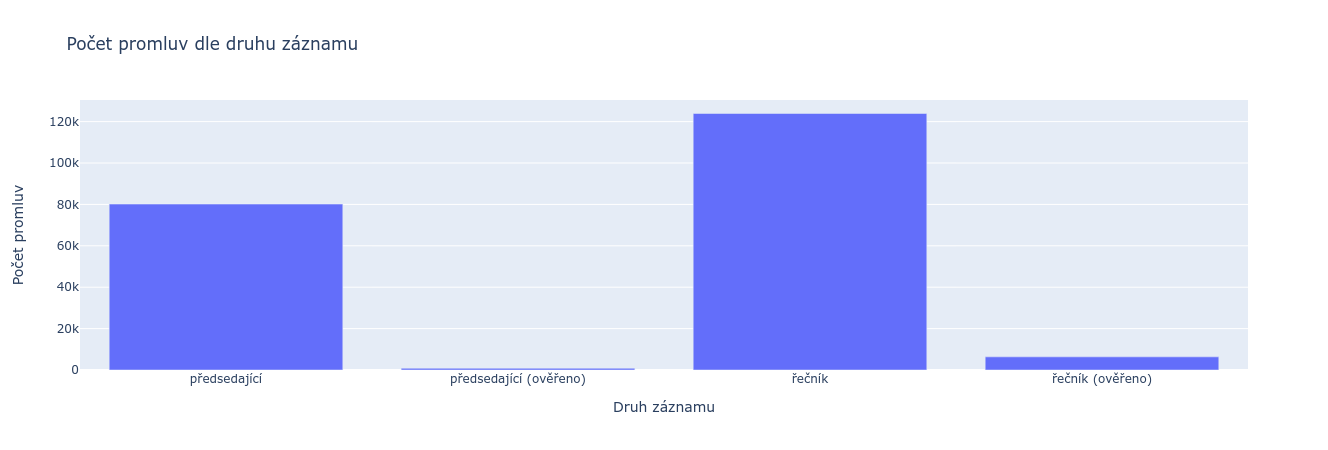

In [92]:
print("Druhy záznamů v tabulce StenoTexty")
print('-'*35)
data = st.groupby('druh').size()
x = data.index
y=data.values
print(data)
fig = go.Figure(go.Bar(x=x, y=y))
fig.update_layout(dict(
    title="Počet promluv dle druhu záznamu",
    xaxis=dict(title="Druh záznamu"),
    yaxis=dict(title="Počet promluv")
))

### Může předsedající vystupovat jako řečník?

Protože se předsedající mohou v průběhu sněmovny měnit, není úplně jednoduché na tuto otázku odpovědět obecně. Pro kvalifikovaný odhad prozkoumáme data předsedajícího s největším počtem záznamů.

In [81]:
predsedajici_s_nejvice_zaznamy = st[~st['id_osoba'].isna() & st.druh.isin(['předsedající', 'předsedající (ověřeno)'])].id_osoba.value_counts().sort_values().index[-1]
predsedajici_mluvi_jako_recnik = len(st[st['id_osoba'] == predsedajici_s_nejvice_zaznamy & st.druh.isin(['řečník', 'řečník (ověřeno)'])])
if predsedajici_mluvi_jako_recnik == 0:
    print("Je velmi pravdepdobné, že předsedající nevystupují v záznamech v roli řečníků, ale jsou vždy označeni jako předsedající.")
    print("Nelze tedy snadno odlišit, kdy mluví za sebe a kdy jenom organizují dění ve sněmovně")

Je velmi pravdepdobné, že předsedající nevystupují v záznamech v roli řečníků, ale jsou vždy označeni jako předsedající.
Nelze tedy snadno odlišit, kdy mluví za sebe a kdy jenom organizují dění ve sněmovně


In [84]:
# Promluva je záznam v tabulce StenoTexty, která nebyla pronesena předsedajícím a není to poznámka. 
promluvy = st[~(st['je_poznamka'] == True) & st.druh.isin(['řečník', 'řečník (ověřeno)'])][fields]
print(f"Bylo identitikováno {len(promluvy)} promluv.")
promluvy.head()

Bylo identitikováno 130235 promluv.


,schuze,id_osoba,jmeno,prijmeni,pohlavi,zkratka,druh,date,text,poznamka,je_poznamka,cas,typ_casu,hlasovani,cisla_hlasovani
index,,,,,,,,,,,,,,,
15,1,303,Vojtěch,Filip,muž,KSČM,řečník,2017-11-20 00:00:00+01:00,"Vážené paní poslankyně, vážení páni poslanci - slib České republiky.",None,False,None,None,None,None
16,1,303,Vojtěch,Filip,muž,KSČM,řečník,2017-11-20 00:00:00+01:00,"""Slibuji věrnost České republice. Slibuji, že budu zachovávat její Ústavu a zákony. Slibuji na svou čest, že svůj mandát budu vykonávat v zájmu všeho lidu a podle svého nejlepšího vědomí a svědomí.""",[Podáním ruky a podpisem svůj slib stvrzuje.],False,None,None,None,None
17,1,303,Vojtěch,Filip,muž,KSČM,řečník,2017-11-20 00:00:00+01:00,"Prosím pány poslance a paní poslankyně, aby přistupovali.",None,False,None,None,None,None
18,1,303,Vojtěch,Filip,muž,KSČM,řečník,2017-11-20 00:00:00+01:00,Pan Ivan Adamec.,[Slibuji.],False,None,None,None,None
19,1,303,Vojtěch,Filip,muž,KSČM,řečník,2017-11-20 00:00:00+01:00,Paní Věra Adámková.,[Slibuji.],False,None,None,None,None


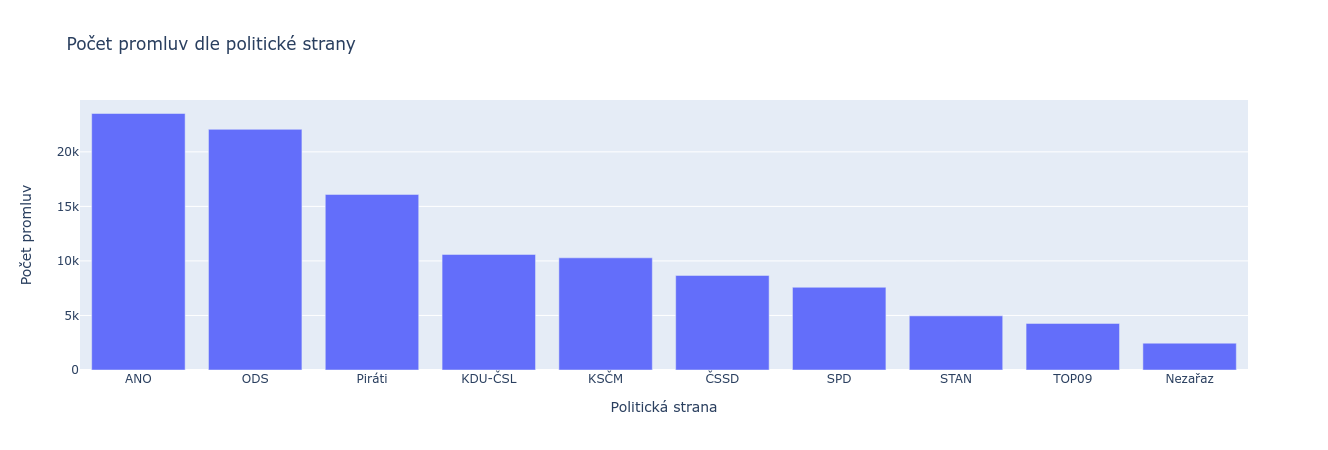

In [114]:
# Počet promluv dle politické strany
data = promluvy.groupby('zkratka').size().sort_values(ascending=False)
x = data.index
y = data.values
fig = go.Figure(go.Bar(x=x, y=y))
fig.update_layout(dict(
    title="Počet promluv dle politické strany",
    xaxis=dict(title="Politická strana"),
    yaxis=dict(title="Počet promluv")
))
fig.show()

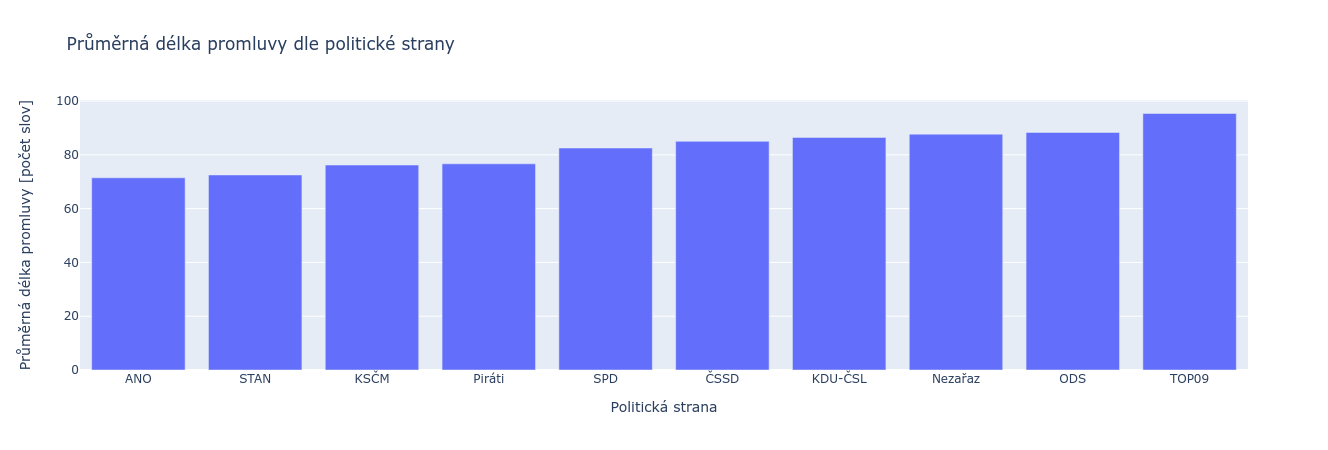

In [95]:
data = promluvy.text.str.split(' ').apply(len).groupby(promluvy.zkratka).mean().sort_values()
x = data.index
y = data.values
fig = go.Figure(go.Bar(x=x, y=y))
fig.update_layout(dict(
    title="Průměrná délka promluvy dle politické strany",
    xaxis=dict(title="Politická strana"),
    yaxis=dict(title="Průměrná délka promluvy [počet slov]")
))
fig.show()

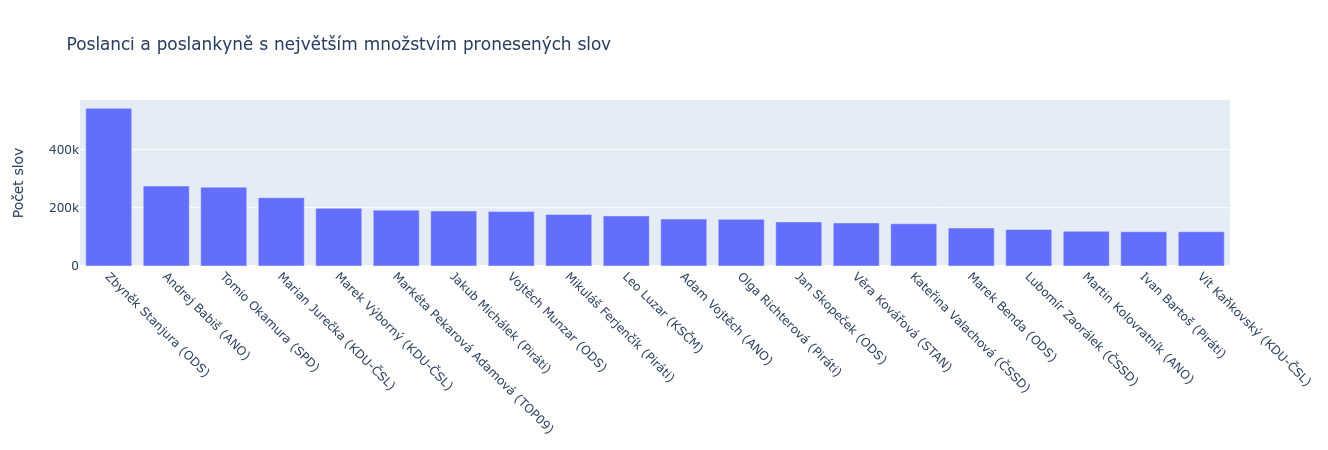

In [112]:
# Toto je třeba normalizovat na počet dní ve sněmovně
K = 20
grouping_field = promluvy.jmeno + ' '+ promluvy.prijmeni + ' (' + promluvy.zkratka + ')'
data = promluvy.text.str.split(' ').apply(len).groupby(grouping_field).sum().sort_values(ascending=False)
x = data.index[:K]
y = data.values[:K]
fig = go.Figure(go.Bar(x=x, y=y))
fig.update_layout(dict(
    title="Poslanci a poslankyně s největším množstvím pronesených slov",
    xaxis=dict(tickangle=45),
    yaxis=dict(title="Počet slov", )
))
fig.show()

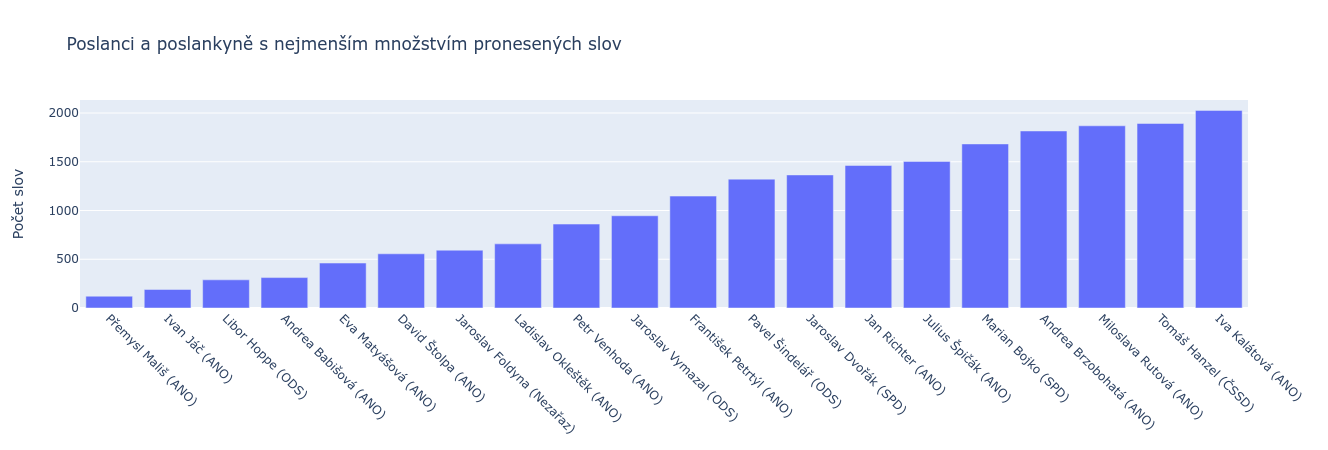

In [111]:
K = 20
grouping_field = promluvy.jmeno + ' '+ promluvy.prijmeni + ' (' + promluvy.zkratka + ')'
data = promluvy.text.str.split(' ').apply(len).groupby(grouping_field).sum().sort_values()
x = data.index[:K]
y = data.values[:K]
fig = go.Figure(go.Bar(x=x, y=y))
fig.update_layout(dict(
    title="Poslanci a poslankyně s nejmenším množstvím pronesených slov",
    xaxis=dict(tickangle=45),
    yaxis=dict(title="Počet slov", )
))
fig.show()

In [18]:
print(f"Poslední běh notebooku dokončen {datetime.now().strftime('%d.%m.%Y v %H:%M:%S')}.")

Poslední běh notebooku dokončen 06.06.2021 v 13:00:30.
